# Credit Approval Model

# Business Goal
  This credit card approval predictor app empowers prospective clients to determine their likelihood of being approved for a credit card without negatively impacting their credit score. By providing a predictive probability of approval, our app makes it easier for applicants make fill out an application while avoiding the potential credit score penalties associated with hard enquiries.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Cleaning/Preprocessing

### 1.  Loading the data set using the "read_csv" function from Pandas

In [2]:
df = pd.read_csv('CC Apps.csv')
df.head(10)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
5,5008819,1,1,1,0,0,0,0,0,2,17,135000.0,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,0
6,5008825,0,1,0,0,0,0,0,0,2,25,130500.0,29.210730,3.019911,Working,Incomplete higher,Married,House / apartment,Accountants,1
7,5008830,0,0,1,0,1,0,0,0,2,31,157500.0,27.463945,4.021985,Working,Secondary / secondary special,Married,House / apartment,Laborers,1
8,5008834,0,0,1,0,0,0,0,1,2,44,112500.0,30.029364,4.435409,Working,Secondary / secondary special,Single / not married,House / apartment,Other,0
9,5008836,1,1,1,0,0,0,0,3,5,24,270000.0,34.741302,3.184186,Working,Secondary / secondary special,Married,House / apartment,Laborers,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [4]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [5]:
#Using whole numbers for the age and years_employed
df['Age'] = df['Age'].astype(int)
df['Years_employed'] = df['Years_employed'].astype(int)

In [6]:
#Number of rows and columns in the dataset
df.shape

(9709, 20)

In [7]:
#checking any missing values
df.isnull().sum()

,0
ID,0
Gender,0
Own_car,0
Own_property,0
Work_phone,0
Phone,0
Email,0
Unemployed,0
Num_children,0
Num_family,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.columns.tolist()

['ID',
 'Gender',
 'Own_car',
 'Own_property',
 'Work_phone',
 'Phone',
 'Email',
 'Unemployed',
 'Num_children',
 'Num_family',
 'Account_length',
 'Total_income',
 'Age',
 'Years_employed',
 'Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type',
 'Target']

In [11]:
df['Total_income'].describe()

,Total_income
count,9.709000e+03
mean,1.812282e+05
std,9.927731e+04
min,2.700000e+04
25%,1.125000e+05
50%,1.575000e+05
75%,2.250000e+05
max,1.575000e+06


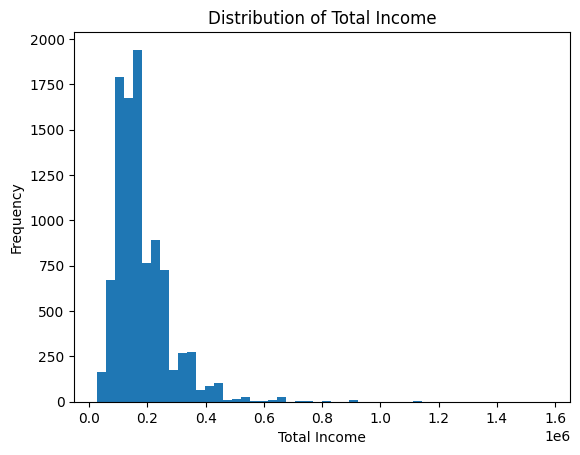

In [12]:
plt.hist(df['Total_income'], bins=50)
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Total Income')
plt.show()

In [13]:
# creating bins for the Total_income column
def bin_income(income):
    if 27000 <= income <= 112000:
        return '27,000 to 112,000'
    elif 112000 < income <= 160000:
        return '112,000 to 160,000'
    elif 160000 < income <= 224000:
        return '160,000 to 224,000'
    elif 224000 < income <= 300000:
        return '224,000 to 300,000'
    else:
        return '300,000+'

df['binned_income'] = df['Total_income'].apply(bin_income)

In [14]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,binned_income
0,5008804,1,1,1,1,0,0,0,0,2,...,427500.0,32,12,Working,Higher education,Civil marriage,Rented apartment,Other,1,"300,000+"
1,5008806,1,1,1,0,0,0,0,0,2,...,112500.0,58,3,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,"112,000 to 160,000"
2,5008808,0,0,1,0,1,1,0,0,1,...,270000.0,52,8,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,"224,000 to 300,000"
3,5008812,0,0,1,0,0,0,1,0,1,...,283500.0,61,0,Pensioner,Higher education,Separated,House / apartment,Other,0,"224,000 to 300,000"
4,5008815,1,1,1,1,1,1,0,0,2,...,270000.0,46,2,Working,Higher education,Married,House / apartment,Accountants,0,"224,000 to 300,000"


In [15]:
#Dropping unnecessary columns
df.drop(['ID','Work_phone','Phone','Email','Total_income'], axis=1, inplace=True)
df.head()

,Gender,Own_car,Own_property,Unemployed,Num_children,Num_family,Account_length,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,binned_income
0,1,1,1,0,0,2,15,32,12,Working,Higher education,Civil marriage,Rented apartment,Other,1,"300,000+"
1,1,1,1,0,0,2,29,58,3,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,"112,000 to 160,000"
2,0,0,1,0,0,1,4,52,8,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,"224,000 to 300,000"
3,0,0,1,1,0,1,20,61,0,Pensioner,Higher education,Separated,House / apartment,Other,0,"224,000 to 300,000"
4,1,1,1,0,0,2,5,46,2,Working,Higher education,Married,House / apartment,Accountants,0,"224,000 to 300,000"


KeyError: "['Total_income'] not in index"

In [ ]:
object_cols = df.select_dtypes(include=[object]).columns
df_onehot = pd.get_dummies(df, columns=object_cols)
df = pd.concat([df.drop(object_cols, axis=1), df_onehot], axis=1)
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,5008804,1,1,1,1,0,0,0,0,2,...,False,False,False,True,False,False,False,False,False,False
1,5008806,1,1,1,0,0,0,0,0,2,...,False,False,False,False,False,False,False,False,True,False
2,5008808,0,0,1,0,1,1,0,0,1,...,False,False,False,False,False,False,True,False,False,False
3,5008812,0,0,1,0,0,0,1,0,1,...,False,False,False,True,False,False,False,False,False,False
4,5008815,1,1,1,1,1,1,0,0,2,...,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis

<Axes: xlabel='binned_income'>

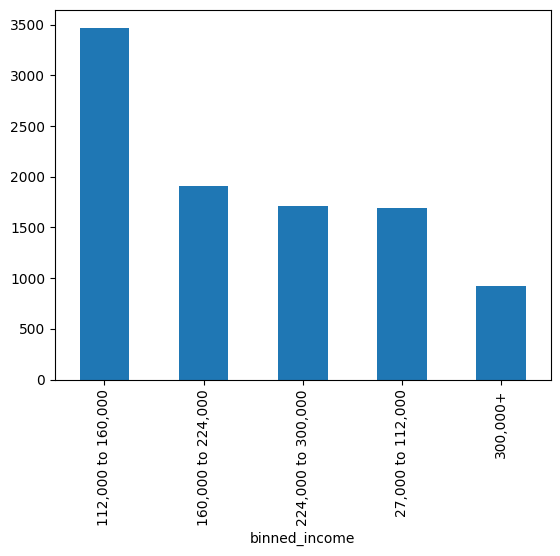

In [16]:
df['binned_income'].value_counts().plot(kind='bar')

In [17]:
df['binned_income'].value_counts()

,count
binned_income,
"112,000 to 160,000",3471
"160,000 to 224,000",1909
"224,000 to 300,000",1716
"27,000 to 112,000",1690
"300,000+",923


ValueError: could not convert string to float: 'Rented apartment'

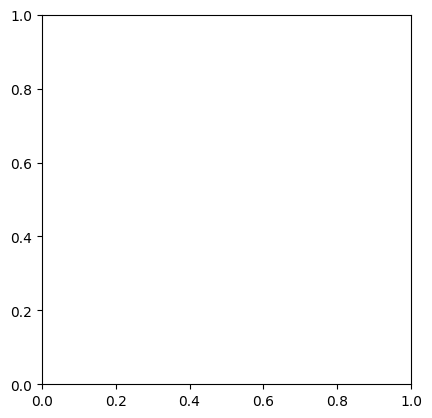

In [22]:
# Create pie chart
plt.pie(df.Housing_type, labels=df.Housing_type.index, autopct='%1.1f%%')
plt.title('Housing Type Distribution')
plt.show()

In [19]:
df['Housing_type'].value_counts()

,count
Housing_type,
House / apartment,8684
With parents,448
Municipal apartment,323
Rented apartment,144
Office apartment,76
Co-op apartment,34


In [20]:
df['Education_type'].value_counts()

,count
Education_type,
Secondary / secondary special,6761
Higher education,2457
Incomplete higher,371
Lower secondary,114
Academic degree,6


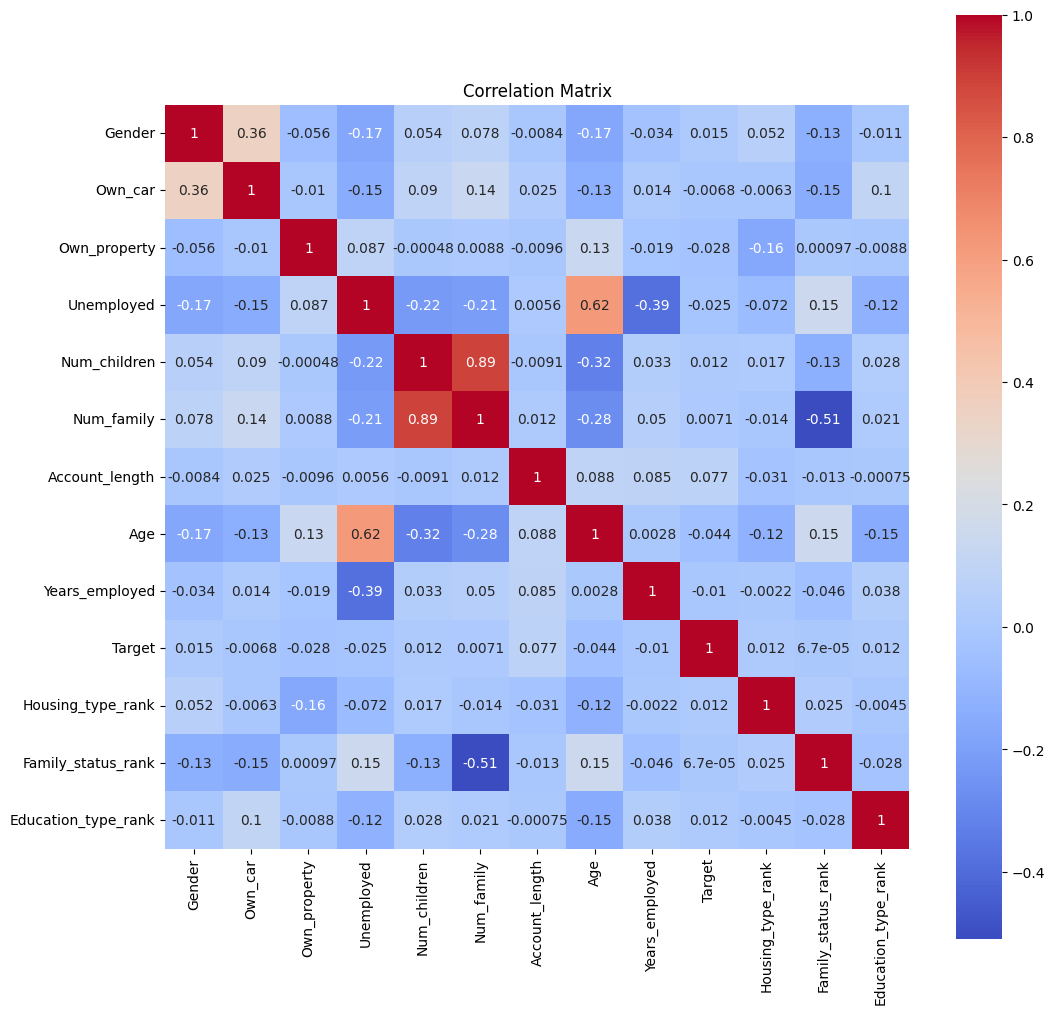

In [26]:
# a heatmap to understand the relationships between two columns.
numeric_cols = df.select_dtypes(include=[int, float]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Looking at the results, we can see that Num_family and Num _children have a stronge positive correlation indicating that as the number of children increase, the number of family increase. This can be used to target familiy oriented marketing as more children increase the number of family members that lead to more consumers.

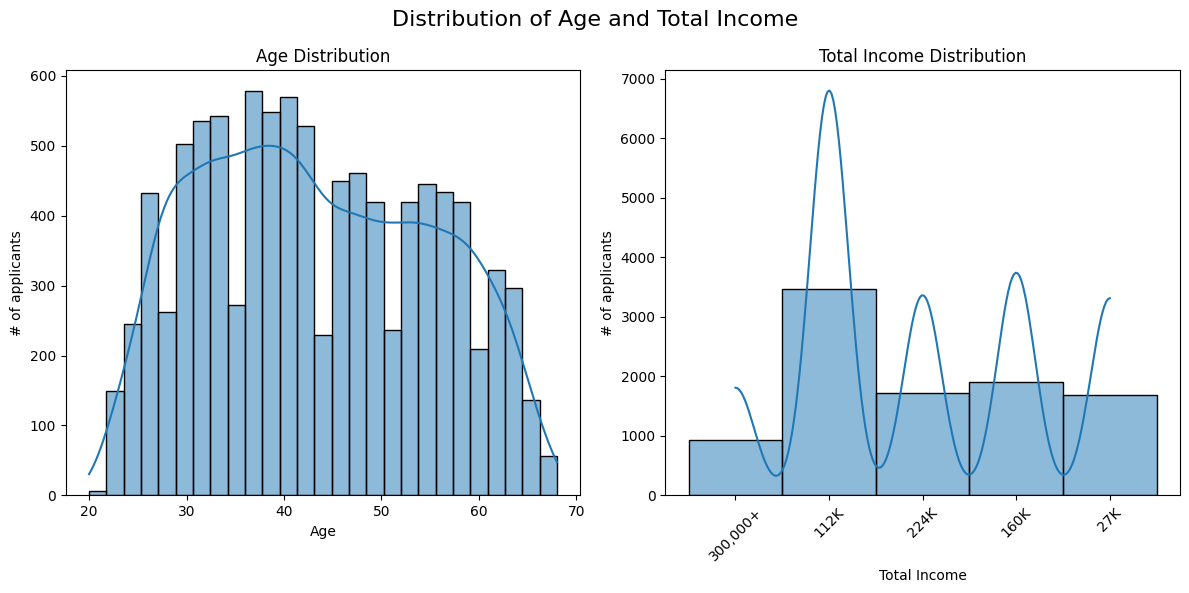

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Age'], ax=ax1, kde=True)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('# of applicants')

sns.histplot(df['binned_income'], ax=ax2, kde=True)
ax2.set_title('Total Income Distribution')
ax2.set_xlabel('Total Income')
ax2.set_ylabel('# of applicants')

# Rotate x-axis labels by 45 degrees
ax2.tick_params(axis='x', rotation=45)

# Use a shorter label format for binned income
labels = []
for label in df['binned_income'].unique():
    try:
        value = int(label.split(' ')[0].replace(',', ''))
        if value < 1000000:
            labels.append(f"{value / 1000:.0f}K")
        else:
            labels.append(f"{value / 1000000:.0f}M")
    except ValueError:
        labels.append(label)  # keep the original label if it can't be converted

ax2.set_xticklabels(labels)

fig.suptitle('Distribution of Age and Total Income', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            9709 non-null   int64  
 1   Gender                                        9709 non-null   int64  
 2   Own_car                                       9709 non-null   int64  
 3   Own_property                                  9709 non-null   int64  
 4   Work_phone                                    9709 non-null   int64  
 5   Phone                                         9709 non-null   int64  
 6   Email                                         9709 non-null   int64  
 7   Unemployed                                    9709 non-null   int64  
 8   Num_children                                  9709 non-null   int64  
 9   Num_family                                    9709 non-null   i